**TASK-6A: Please use the latest version of the AD dataset to provide the following outputs:**

y : CDRGLOB X : all columns except for the label Train-test split: .80-.20 (please use the stratify parameter) Cross-validation both with k=5 and k=10

Please compare and discuss the outputs obtained from the cross validation step by k=5 and k=10.



In [1]:
import pandas as pd

data = pd.read_excel("Temporary_data3_Left_Right_Copy.xlsx")

In [2]:
data.head()

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527


In [3]:
X = data.drop(['CDRGLOB'], axis = 1)
y=data.CDRGLOB

In [4]:
X

,SEX,EDUC,MARISTAT,INDEPEND,RESIDENC,NACCFAM,ANYMEDS,SMOKYRS,NACCTBI,DIABETES,...,RSUPFR,RSUPFRM,RSUPPAR,RSUPPARM,RSUPTEM,RSUPTEMM,RSUPMAR,RSUPMARM,RTRTEM,RTRTEMM
0,2,18,1,1,1,1,1,0,0,0,...,27.9038,2.2157,10.3481,1.7014,13.4250,1.7419,9.8700,1.6792,0.8906,1.1947
1,1,11,1,1,1,1,1,0,0,0,...,29.0600,2.6900,9.2500,1.6300,14.8800,2.3000,7.2700,1.8900,1.3800,2.0300
2,2,16,1,1,1,1,1,10,0,1,...,33.0000,2.5400,13.6900,1.5600,16.2300,2.0700,10.1100,1.8400,1.0100,1.5000
3,1,14,1,1,1,0,1,0,0,1,...,31.6800,2.4100,9.6400,1.4500,15.1100,1.6400,10.3900,1.8300,0.7400,1.1000
4,1,16,1,1,2,0,1,50,0,0,...,28.0631,1.9501,9.1125,1.0427,13.3763,1.6270,7.5844,1.4595,0.6638,0.8527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,1,20,1,1,1,1,1,0,0,0,...,24.6892,2.6528,10.5460,2.1712,14.1128,2.8833,9.3176,2.3582,0.6735,1.0270
1350,1,16,1,2,1,0,1,0,0,0,...,24.7908,2.0993,10.4094,1.4855,10.7880,1.9027,10.2034,2.0484,0.7267,0.7946
1351,2,14,2,1,1,1,1,0,0,0,...,23.8500,2.1200,12.3900,1.5300,12.6600,1.9900,9.4800,1.7400,1.1800,1.5900
1352,2,20,3,1,1,1,1,25,0,0,...,31.3500,2.4300,10.8200,1.7000,13.7700,2.1000,11.1200,2.1400,1.3100,1.5200


In [5]:
y

0       0
1       2
2       0
3       0
4       1
       ..
1349    1
1350    2
1351    0
1352    0
1353    0
Name: CDRGLOB, Length: 1354, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [7]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy of Naive Bayes is:",accuracy_score(y_test, y_model)*100)

Accuracy of Naive Bayes is: 69.00369003690037


In [9]:
from sklearn.model_selection import cross_val_score

for_five = cross_val_score(model, X, y, cv=5)
for_five

array([0.63099631, 0.63837638, 0.65682657, 0.55350554, 0.57407407])

In [10]:
from sklearn.model_selection import cross_val_score

for_ten= cross_val_score(model, X, y, cv=10)
for_ten

array([0.625     , 0.60294118, 0.52941176, 0.72794118, 0.65925926,
       0.6962963 , 0.6962963 , 0.42962963, 0.51111111, 0.66666667])

In [11]:
print("Cross-Validation's mean for k=5:",for_five.mean()*100)
print("Cross-Validation's mean for k=10:",for_ten.mean()*100)

Cross-Validation's mean for k=5: 61.075577422440894
Cross-Validation's mean for k=10: 61.44553376906319


**TASK-6B: Please perform a grid search run with the use of a ML algorithm (and its 3 parameters at least with 5 different values for each) you select as opposed to the Gaussian Naive Bayes algorithm. Then compare the outputs with respect to the accuracy values on the test dataset.**

In [12]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier


In [13]:
model_dtc=DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_model2 = model_dtc.predict(X_test)
print("Accuracy of the model relative to Decision Tree Calssifier= ",accuracy_score(y_test,y_model2))

Accuracy of the model relative to Decision Tree Calssifier=  0.6236162361623616


In [14]:
param_grid = {
    
    'min_samples_split': [1,2,4,8,10],
    'min_samples_leaf': [1, 2, 4, 7, 10],
    'max_features' : [1,2,4,8,10]
      }
          
grid = GridSearchCV(model_dtc, param_grid, cv=10)


In [15]:
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 1250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_features': [1, 2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 7, 10],
                         'min_samples_split': [1, 2, 4, 8, 10]})

In [16]:
grid.best_params_

{'max_features': 8, 'min_samples_leaf': 10, 'min_samples_split': 8}

In [17]:
dtc2 = grid.best_estimator_
grid_best = dtc2.fit(X_train, y_train).predict(X_test)

print("Accuracy of the model after grid search",accuracy_score(y_test,grid_best))

Accuracy of the model after grid search 0.5387453874538746


**TASK-6C: Please provide a visualization of the best algorithm with respect to the two of the dimensions in the dataset and please annotate the labels (separately for true labels and predicted labels in 2 different graphs). For instance, x-axis might be RPARCORT and y-axis might be LTEMPCOR.**

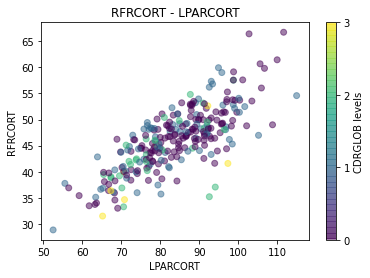

In [18]:
import matplotlib.pyplot as plt
plt.scatter(X_test["RFRCORT"], X_test["LPARCORT"],c=y_test,alpha=0.5)
plt.title("RFRCORT - LPARCORT")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("RFRCORT")
plt.xlabel("LPARCORT")
plt.show();

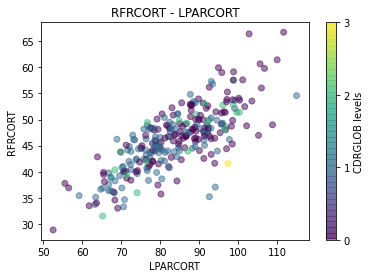

In [19]:
import matplotlib.pyplot as plt
plt.scatter(X_test["RFRCORT"], X_test["LPARCORT"],c=grid_best,alpha=0.5)
plt.title("RFRCORT - LPARCORT")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("RFRCORT")
plt.xlabel("LPARCORT")
plt.show();

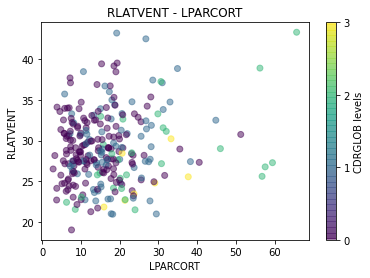

In [20]:
plt.scatter(X_test["RLATVENT"], X_test["LOCCORT"],c=y_test,alpha=0.5)
plt.title("RLATVENT - LPARCORT")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("RLATVENT")
plt.xlabel("LPARCORT")
plt.show();

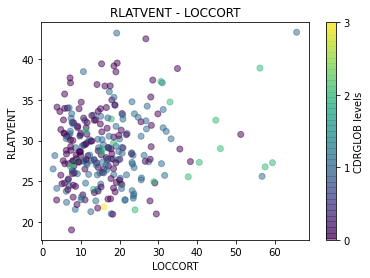

In [21]:
plt.scatter(X_test["RLATVENT"], X_test["LOCCORT"],c=grid_best,alpha=0.5)
plt.title("RLATVENT - LOCCORT")
plt.colorbar(label="CDRGLOB levels", ticks = range(4))
plt.ylabel("RLATVENT")
plt.xlabel("LOCCORT")
plt.show();

**TASK-6D: Please apply one of the dimensionality reduction methods (PCA or isomap) and reduce the features matrix into 2 extracted dimensions. Then provide a visualization with respect to these dimensions.**

In [22]:
from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(X)
isomap_2Da = iso.transform(X)
isomap_2D= pd.DataFrame(isomap_2Da, columns=['Component 1', 'Component 2'])

In [23]:
isomap_2D.head()

,Component 1,Component 2
0,215.109216,-219.668131
1,576.977259,307.850095
2,398.643722,-342.356821
3,371.799622,-43.906572
4,284.761039,298.410267


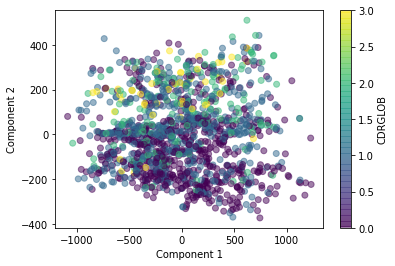

In [24]:
plt.scatter(isomap_2Da[:, 0], isomap_2Da[:, 1],c=y,alpha=0.5)
plt.colorbar(label='CDRGLOB')
plt.xlabel("Component 1")
plt.ylabel("Component 2");

**TASK-6E: Please perform one of the clustering techniques (k-means or GMM) on the dataset (on the features matrix) then again provide a visual illustration with respect to the features like age, education.**

In [25]:
from sklearn.cluster import KMeans
model3=KMeans(n_clusters=3)
model3.fit(X_train,y_train)
model_km=model3.predict(X_test)
print("Accuracy rate of the model with K-Means:",accuracy_score(y_test,model_km))

Accuracy rate of the model with K-Means: 0.4022140221402214


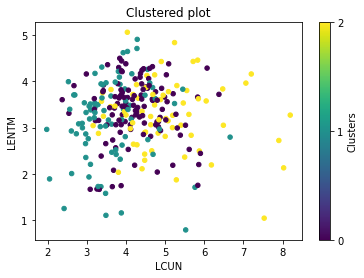

In [26]:
plt.scatter(X_test["LCUN"], X_test["LENTM"],c=model_km, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("LENTM")
plt.xlabel("LCUN")
plt.show();

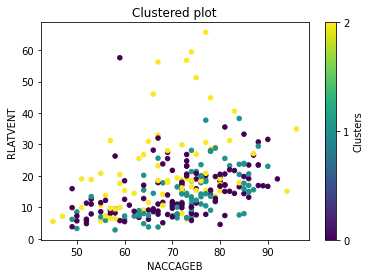

In [27]:
plt.scatter(X_test["NACCAGEB"], X_test["RLATVENT"],c=model_km, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("RLATVENT")
plt.xlabel("NACCAGEB")
plt.show();

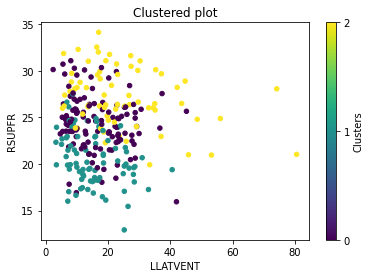

In [28]:
plt.scatter(X_test["LLATVENT"], X_test["RSUPFR"],c=model_km, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("RSUPFR")
plt.xlabel("LLATVENT")
plt.show();

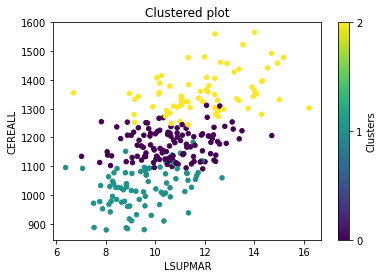

In [29]:
plt.scatter(X_test["LSUPMAR"], X_test["CEREALL"],c=model_km, s=20)
plt.title("Clustered plot")
plt.colorbar(label="Clusters",ticks=range(3))
plt.ylabel("CEREALL")
plt.xlabel("LSUPMAR")
plt.show();